<center>
    <h1> Cardiovascular Disease</h1>
        <h2>ML Project</h2>
            <h3>Model Creation</h3>
            <h3>Priyanshu Choudhary | 23010101052</h3>
</center>

## 1 Setup & Data Preparation
Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

Load the  dataset and display the first 5 rows.

In [2]:
df = pd.read_csv('cardio_clean.csv')
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177


Separate the dataset into Features (`X`) and Target (`y`).

In [3]:
X = df.drop(['cardio'], axis=1)
y = df['cardio']

In [4]:
X

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,BMI
0,2,168,62.0,110,80,1,1,0,0,1,50,21.967120
1,1,156,85.0,140,90,3,1,0,0,1,55,34.927679
2,1,165,64.0,130,70,3,1,0,0,0,51,23.507805
3,2,169,82.0,150,100,1,1,0,0,1,48,28.710479
4,1,156,56.0,100,60,1,1,0,0,0,47,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...
68542,2,168,76.0,120,80,1,1,1,0,1,52,26.927438
68543,1,158,126.0,140,90,2,2,0,0,1,61,50.472681
68544,2,183,105.0,180,90,3,1,0,1,0,52,31.353579
68545,1,163,72.0,135,80,1,2,0,0,0,61,27.099251


-----

## 2 Train-Test Split (Step 1)
Split the dataset into Training(80%) and Testing (20%) .

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Shape: {X_train.shape}")
print(f"Testing Shape:  {X_test.shape}")

Training Shape: (54837, 12)
Testing Shape:  (13710, 12)


-----

## 3 Normalization / Scaling (Step 2)

Scale the data:

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data Scaled Successfully.")

Data Scaled Successfully.


-----

## 4 Model Training (Random Forest)
Initialize the **Random Forest Classifier**.

In [7]:
# model = RandomForestClassifier(n_estimators=100, random_state=42)
model = RandomForestClassifier(
    n_estimators=200,     
    max_depth=10,         
    min_samples_leaf=10,   
    min_samples_split=10,
    random_state=42
)

Train (fit) the model using the **Scaled Training Data**.

In [8]:
model.fit(X_train_scaled, y_train)
print("Model Trained.")

Model Trained.


## 5 Evaluation 

predictions on the Scaled Test Set (`X_test_scaled`).

In [9]:
y_pred = model.predict(X_test_scaled)

Calculate the Accuracy Score.

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 73.21%


Display the **Confusion Matrix** using a Heatmap.


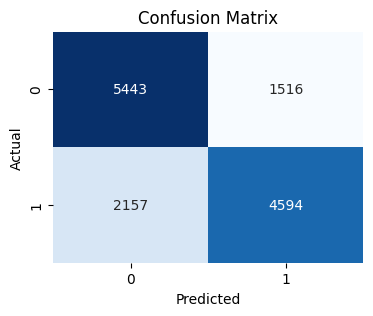

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Print the full **Classification Report** (Precision, Recall, F1-Score).

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6959
           1       0.75      0.68      0.71      6751

    accuracy                           0.73     13710
   macro avg       0.73      0.73      0.73     13710
weighted avg       0.73      0.73      0.73     13710



-----

## 6. Overfitting & Underfitting Check 

check Overfitting

In [13]:
y_train_pred = model.predict(X_train_scaled)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_acc*100:.2f}%")
print(f"Testing Accuracy:  {test_acc*100:.2f}%")

if (train_acc - test_acc) > 0.10:
    print("Warning: Potential Overfitting detected.")
else:
    print("Good Fit: Train and Test scores are balanced.")

Training Accuracy: 74.95%
Testing Accuracy:  73.21%
Good Fit: Train and Test scores are balanced.


# Hyperparameter tuning

In [14]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

In [15]:
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print(f"Best CV Accuracy: {grid_search.best_score_ * 100:.2f}%")

best_model = grid_search.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best CV Accuracy: 73.58%


## 7 Final Model Export

Save the best model and the scaler to a single pickle file (`cardio_model.pkl`).

In [18]:
data_to_save = {
    "model": best_model,
    "scaler": scaler
}

with open('cardio_model.pkl', 'wb') as file:
    pickle.dump(data_to_save, file)